### Почему совпадают максимумы?

<img src="dj0.png",width=800,height=800>

<img src="dj.png",width=600,height=600>

## 1) accuracy_score и roc_auc_score

Здесь roc_auc_score считался не совсем обычно: сначала ответы бинаризовались, а затем считался au roc для ответов в формате 0, 1.

Таким образом, мы получаем ситуацию, ROC-кривая строится по трем точкам: (0,0), (FPR, TPR) и (1, 1) (т.к. объекты с одинаковыми скорами 0 и 1).

In [126]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
y_true = [1,1,0,1,0,0]
y_pred = [1,0,0,1,0,1]

fpr, tpr, _ = roc_curve(y_true, y_pred)
au_roc = auc(fpr, tpr)
au_roc

0.6666666666666667

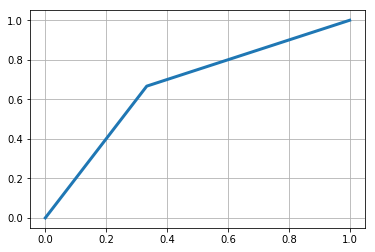

In [128]:
plt.figure()
plt.grid()
lw = 2
plt.plot([0]+list(fpr), [0]+list(tpr), lw=3)

Соответственно, посчитаем AUC, собрав его из площадей соотв. треугольников/прямоугольников:

$$AUC = \frac{(TPR * FPR)}{2} + \frac{(1-TPR) * (1-FPR)}{2} + (1 - FPR) * TPR = \frac{1 + TPR - FPR}{2}$$
$$ = \frac{TPR + TNR}{2} $$
Получили balanced accuracy!

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$


$$Balanced\_Accuracy = \frac{1}{2}(\frac{TP}{TP + FN} + \frac{TN}{TN + FP})$$

Итак, в общем случае accuracy != balanced accuracy, но тут случай, когда выборка сбалансирована. Это значит, что 
$$TP + FN \approx TN + FP \approx \frac{n}{2}$$
Заменив соотв. слагаемые, получаем $Accuracy = Balanced\_Accuracy$

## 2) matthews

Так выглядит коэффициент:

$$MCC = \frac{TP * TN - FP * FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$$

У нас ситуация со сбалансированными классами, так что $TP + FN \approx TN + FP \approx \frac{n}{2}$

Перепишем числитель: $TP * TN - FP * FN = TP * TN - (\frac{n}{2} - TN) * (\frac{n}{2} - TP)) =$

$ \frac{n}{2}(TP + TN) - \frac{n^2}{4}$

Перепишем знаменатель: 
$$\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)} = \frac{n}{2}\sqrt{(TP + FP)(TN + FN)} = \frac{n}{2}\sqrt{\frac{n^4}{4} - (TP - TN)^2}$$

Что это означает?

При максимизации MCC мы хотим максимизировать $(TP + TN)$ (как в accuracy) с одной стороны.

С другой хотим минимизировать $(TP - TN)^2$

$TP + TN$ максимальный там же где и accuracy. Заодно $TP \approx TN$ из-за симметричности распределений ответов.

### 3) cohen kappa score

$$\kappa = \frac{Accuracy - Accuracy_{Chance}}{1 - Accuracy_{Chance}}$$

$$Accuracy_{Chance} = \frac{(TP+FP)(TP+FN) + (TN+FP)(TN+FN)}{(TP + TN + FP + FN)^2}$$

Перепишем $Accuracy_{Chance}$ для нашего случая:

$$Accuracy_{Chance}= \frac{\frac{n}{2} (TP+FP+TN+FN)}{n^2}= \frac{n^2}{2n^2} = \frac{1}{2}$$

Получается, что это аналогично максимизации обычной точности.